<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_003_study_essential/_004_mentoring/_000_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.utils import np_utils
from keras.datasets import mnist # 손글씨 데이터 import
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

In [ ]:
np.random.seed(3)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape # 첫 번째 인자 row 개수, 두 번째 인자 x, 세 번째 인자 y

(60000, 28, 28)

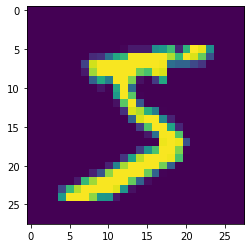

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

In [ ]:
x_val = x_train[50000:] # val == validation
y_val = y_train[50000:] 

length = len(x_train)
print_text = 'before len: {}'.format(length)
print(print_text)

x_train = x_train[:50000]
y_train = y_train[:50000]
print('after len: {}'.format(len(x_train)))

before len: 60000
after len: 50000


In [ ]:
x_train = x_train.reshape(50000, 784).astype('float32') / 255.
x_val = x_val.reshape(10000, 784).astype('float32') / 255.
x_test = x_test.reshape(10000, 784).astype('float32') / 255.

In [ ]:
255 / 255.

1.0

In [ ]:
235 / 255.

0.9215686274509803

In [ ]:
target_arr = np.random.choice(50000, 700)
print('{}개의 원소를, 총 {} row로 추출'.format(len(np.unique(target_arr)), len(target_arr)))

693개의 원소를, 총 700 row로 추출


In [ ]:
train_random_indexs = np.random.choice(50000, 700)
val_random_indexs = np.random.choice(10000, 300)

train_random_indexs[:5], val_random_indexs[:5]

(array([ 3464, 25781, 32426, 16398,  3808]),
 array([7260, 2026, 8615, 3810, 1306]))

In [ ]:
x_train = x_train[train_random_indexs]
y_train = y_train[train_random_indexs]

x_val = x_val[val_random_indexs]
y_val = y_val[val_random_indexs]

In [ ]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((700, 784), (700,), (300, 784), (300,))

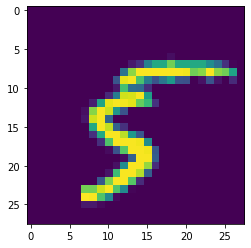

In [ ]:
plt.imshow(x_val[1].reshape(28, 28))

In [ ]:
y_val[0], y_val[1]

(6, 5)

In [ ]:
# 라벨링 전환
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [ ]:
temp = np_utils.to_categorical(y_val)
temp[0], temp[1]

(array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [ ]:
model = Sequential()

# 3 개의 축약된 문법으로 풀어서 작성하면. 아래와 같다.
"""
1. Input layer
2. Dense layer
3. Activation layer
"""

model.add(Dense(units=2, input_dim=28 * 28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train,
                 y_train,
                 epochs=100,
                 batch_size=64,
                 validation_data=(x_val, y_val))

In [ ]:
import matplotlib.pyplot as plt  # 시각화 라이브러리

In [ ]:
hist.history['accuracy'], len(hist.history['accuracy'])

In [ ]:
hist.history

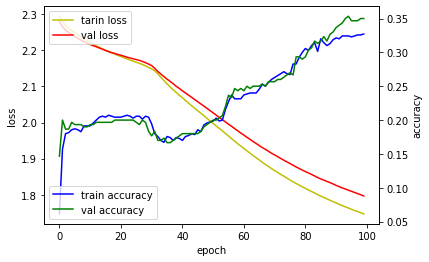

In [ ]:
flg, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='tarin loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()